## **Inference Model**

In [2]:
from google.colab import drive
drive.mount('/content/drive')                         # Memunculkan dialog untuk mengakses Google Drive

Mounted at /content/drive


In [17]:
import tensorflow as tf
import numpy as np
from PIL import Image
from google.colab import files
import io
import os
import matplotlib.pyplot as plt

# Menyiapkan model TFLite dan nama kelas (jalankan sekali saja)
def setup_model_and_classes():
    global interpreter, input_details, output_details, class_names
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')

    # Path ke model TFLite
    tflite_model_path = '/content/drive/MyDrive/plants-type-datasets/TebakGambar_TFLite.tflite'

    # Muat model TFLite
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Dapatkan informasi input dan output tensor
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Menentukan nama kelas dari dataset
    dataset_dir = '/content/drive/MyDrive/plants-type-datasets/dataset'
    class_names = sorted(os.listdir(dataset_dir))

    print("Model dan kelas telah disiapkan.")
    print("Input details:", input_details)
    print("Output details:", output_details)
    print("Class names:", class_names)

# Fungsi untuk memproses gambar dan mendapatkan prediksi
def predict_image():
    # Unggah file gambar
    uploaded = files.upload()

    # Fungsi untuk memproses gambar
    def preprocess_image(image, target_size):
        image = image.resize(target_size)
        image = np.array(image)
        image = image.astype(np.float32)
        image = image / 255.0  # Normalisasi jika diperlukan
        return np.expand_dims(image, axis=0)  # Tambahkan batch dimension

    # Proses setiap file gambar yang diunggah
    for filename in uploaded.keys():
        print('Nama file yang diunggah: {}'.format(filename))

        # Baca gambar dari file yang diunggah
        image = Image.open(io.BytesIO(uploaded[filename]))

        # Tampilkan gambar yang diunggah
        plt.figure(figsize=(6, 6))
        plt.imshow(image)
        plt.axis('off')  # Matikan sumbu
        plt.show()

        # Proses gambar
        target_size = tuple(input_details[0]['shape'][1:3])  # Ukuran target dari model
        input_data = preprocess_image(image, target_size)

        # Set input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Jalankan inferensi
        interpreter.invoke()

        # Ambil hasil output
        output_data = interpreter.get_tensor(output_details[0]['index'])
        print("Output data:", output_data)

        # Ambil indeks kelas dengan probabilitas tertinggi
        predicted_class_index = np.argmax(output_data)
        predicted_class_name = class_names[predicted_class_index]

        print("Predicted class index:", predicted_class_index)
        print("Predicted class name:", predicted_class_name)

# Jalankan fungsi setup_model_and_classes sekali untuk menyiapkan model
setup_model_and_classes()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model dan kelas telah disiapkan.
Input details: [{'name': 'serving_default_keras_tensor_79:0', 'index': 0, 'shape': array([  1, 150, 150,   3], dtype=int32), 'shape_signature': array([ -1, 150, 150,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'StatefulPartitionedCall_1:0', 'index': 25, 'shape': array([ 1, 30], dtype=int32), 'shape_signature': array([-1, 30], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Class names: ['aloevera', 'banana', 'bilimbi', 'cantaloupe

Saving LidahBuaya.jpg to LidahBuaya.jpg
Nama file yang diunggah: LidahBuaya.jpg


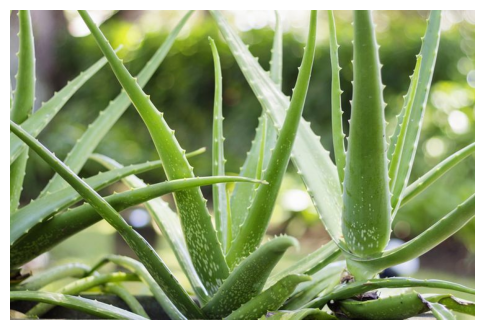

Output data: [[9.09816265e-01 8.42364841e-07 9.05520562e-03 1.21304004e-06
  1.58266630e-07 8.22237344e-04 2.09471426e-10 4.59940609e-04
  1.09456784e-10 3.75191718e-02 3.00909642e-06 1.34844766e-08
  2.85080392e-02 3.47496453e-03 3.71300057e-03 1.01741107e-05
  1.20970071e-07 4.63874749e-05 3.51699714e-06 1.85534809e-05
  5.29541168e-04 8.69224677e-05 3.57824541e-03 5.21739935e-07
  5.10253312e-06 2.10630405e-03 7.16213208e-07 1.87332727e-04
  6.71047974e-06 4.59135990e-05]]
Predicted class index: 0
Predicted class name: aloevera


In [18]:
# Gunakan fungsi predict_image untuk mengunggah dan memproses gambar baru
predict_image()

Saving KelapaMuda.jpg to KelapaMuda.jpg
Nama file yang diunggah: KelapaMuda.jpg


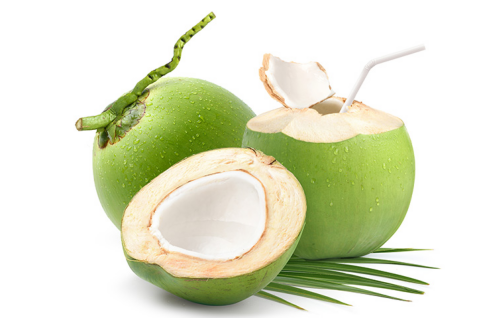

Output data: [[6.13719094e-05 1.37004150e-07 8.32622936e-06 2.21987705e-07
  2.83984924e-08 9.60133195e-01 7.22623017e-10 3.81820051e-08
  2.54350430e-11 1.30534249e-06 3.28642535e-08 6.47901244e-09
  3.47554125e-02 1.47507222e-07 7.81729792e-09 6.30722439e-04
  3.19742561e-08 2.47217758e-06 7.38114139e-08 1.78517882e-06
  6.08480434e-07 3.05437254e-07 4.40199953e-03 2.68963740e-09
  5.19909122e-07 1.48997605e-08 1.52959927e-07 7.88697662e-07
  2.42431810e-07 6.25878727e-08]]
Predicted class index: 5
Predicted class name: coconut


In [19]:
# Gunakan fungsi predict_image untuk mengunggah dan memproses gambar baru
predict_image()